In [6]:
import rebound
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



#sim = rebound.Simulation()
#sim.add(["Sun", "Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"])

#Mass is 4.006x10^21 +-0.040  taken from Ragozzine and Brown 2009
#sim.add(["Haumea"], m=4.006e21)


#sim.add(["Hiiaka"], m=1.79e19) 
#sim.add(["Namaka"], m=1.79e18)

#Mass from Thirouin 2016. Assumes density of 1gcm^-3
#sim.add(["1995 SM55"], m=1.73e18)
#sim.add(["1996 TO66"], m=2.62e18)
#sim.add(["1999 OY3"], m=0.11e18)
#sim.add(["2002 TX300"], m=12.25e18) #Also can be found in Elliot with m=1.1e19. Went with most recently published
#sim.add(["2003 OP32"], m=9.09e18)
#sim.add(["2003 SQ317"], m=0.22e18)
#sim.add(["2003 UZ117"], m=0.87e18)
#sim.add(["2005 CB79"], m=1.99e18)
#sim.add(["2005 RR43"], m=5.23e18)
#sim.add(["2009 YE7"], m=3.01e18)

#sim.save("solarSystem.bin")

sim = rebound.Simulation("solarSystem.bin")
#fig, ax_main = rebound.OrbitPlot(sim)
#fig.savefig("image.png")
#fig.show()
#rebound.OrbitPlot(sim, figsize=(20,20), slices=0.3, unitlabel="[AU]", color=True)

#Jupiter's sidereal orbit: 11.86 years. dt = 11.86/30 = 0.395333333    From NASA Cosmos
sim.dt = 0.395333333
Noutputs = 10
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0,20.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y
    z[1][i] = ps[3].z
    print(x)
    print(" ")
    #print(y)
    #print(" ")
    #print(z)
    #print(" ")




[[-0.36133404  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.54932113  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
 
[[-0.36133404 -0.27376689  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.54932113 -0.74515975  0.          0.          0.          0.
   0.          0.          0.          0.        ]]
 
[[-0.36133404 -0.27376689  0.15258732  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.54932113 -0.74515975 -0.78841127  0.          0.          0.
   0.          0.          0.          0.        ]]
 
[[-0.36133404 -0.27376689  0.15258732  0.34453757  0.          0.
   0.          0.          0.          0.        ]
 [ 0.54932113 -0.74515975 -0.78841127  0.45738533  0.          0.
   0.          0.          0.          0.        ]]
 
[[-0.36133404 -0.27376689  0.15258732  0.34453757 -0

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

x = []
y = []

df = pd.read_csv(r"~/researchProject/ResearchProject/allKBOs.csv", sep=",")
for row in df:
    if row!=0:  
        x.append(int(row[4]))
        y.append(int(row[5]))
    
plt.plot(x,y)
plt.xlabel('Eccentricity')
plt.ylabel('Semi-major axis')
plt.title('a vs e of all KBOs')
plt.show()
#print(df)

IndexError: string index out of range

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

database = pd.read_csv(r"~/researchProject/ResearchProject/allKBOs.csv", sep=",")

x = database.e
y = database.a

plt.plot(x,y)
plt.xlabel('Eccentricity')
plt.ylabel('Semi-major axis')
plt.title('a vs e of all KBOs')
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = []
y = []
col = []
num = 0

database = pd.read_csv(r"~/researchProject/ResearchProject/a_and_e.csv")


for row in database:
    if num<18:
        x.append(float(row[0]))
        #y.append(float(row[1]))
        print(x)
        col.append('blue')
        num += 1
    else:
        x.append(float(row[0]))
        y.append(float(row[1]))
        col.append('black')
        num += 1
       
for row in database:
    plt.scatter(x[row], y[row], c = col[row])
   
plt.show()

[0.0]
[0.0, 4.0]


TypeError: list indices must be integers or slices, not str

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

x = np.zeros(3412)
y = np.zeros(3412)
col = []
num = 0

database = pd.read_csv(r"~/researchProject/ResearchProject/a_and_e.csv", sep=',', dtype=np.float64)
#print(database)
#database.dtypes
#print(row)

for x in database:
    x[num] = row[0]
    y[num] = row[1]
    num += 1
    print(x)

#cols = database.columns
#or col in cols:
    #database[col] = database[col].astype(float)

#for row in database:
    #if num<18:
        #x[num] = row[0]
        #print(row)
        #print(x)
        #y[num] = row[1]
        #print(row)
        #print(y)
        #col.append('blue')
        #num += 1
    #else:
        #x[num] = row[0]
        #print(x)
        #y[num] = row[1]
        #print(y)
        #col.append('black')
        #num += 1
        
#arrLength = len(x)        

#for i in range(arrLength):
    #plt.scatter(x[i], y[i], c = col[i])
    
#plt.show()
#print(num)

TypeError: 'str' object does not support item assignment

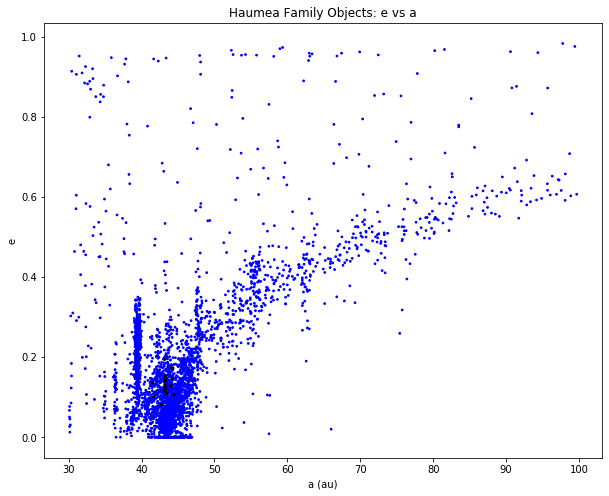

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

database = pd.read_csv("~/researchProject/ResearchProject/a_and_e.csv")
#print(database)
col = ['blue' if n<3393 else 'black' for n in range(len(database.index))]
size = [5 if col[n]=='black' else 3 for n in range(len(col))]
fig = database.plot(kind='scatter', x='a (au)', y='e', s=size, c=col, figsize=(10,8), title='Haumea Family Objects: e vs a').get_figure()
fig.savefig('a__and_e.png')


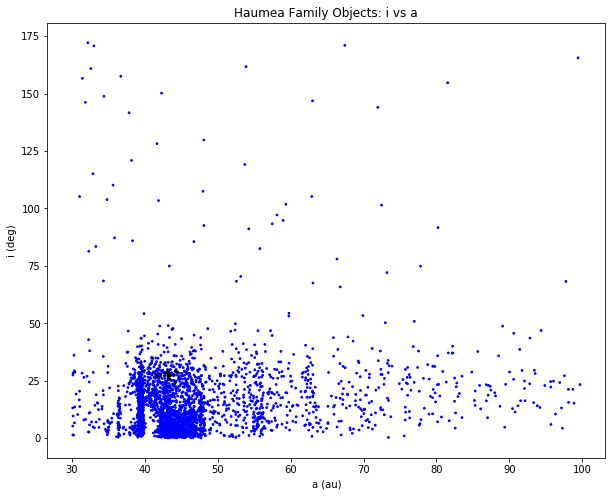

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

database2 = pd.read_csv("~/researchProject/ResearchProject/a_and_i.csv")
#print(database)
col = ['blue' if n<3393 else 'black' for n in range(len(database2.index))]
size = [5 if col[n]=='black' else 3 for n in range(len(col))]
fig = database2.plot(kind='scatter', x='a (au)', y='i (deg)', s=size, c=col, figsize=(10,8), title='Haumea Family Objects: i vs a').get_figure()
fig.savefig('a_and_i.png')